In [1]:
import sys
import pandas as pd

sys.path.append('../../')
from operations.api import KGFarm

kgfarm = KGFarm(database='test_1')

Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


In [2]:
entity_info = kgfarm.search_entity(entity_name='customer')
entity_info

,Entity,Physical_representation,Feature_view,Physical_table,Number_of_rows,File_source
0,customer_bank_stats,customer_id,Feature_view_09,bank_stats.csv,12162,/Users/shubhamvashisth/Documents/data/data_lake/bank-marketing-dataset/data/bank_stats.csv
1,customer_bank,customer_id,Feature_view_10,bank.csv,11162,/Users/shubhamvashisth/Documents/data/data_lake/bank-marketing-dataset/data/bank.csv
2,customer_churn,CustomerId,Feature_view_06,churn.csv,10000,/Users/shubhamvashisth/Documents/data/data_lake/churn-for-bank-customers/data/churn.csv
3,customer_Churn_Modelling,CustomerId,Feature_view_08,Churn_Modelling.csv,10000,/Users/shubhamvashisth/Documents/data/data_lake/bank-customer-churn-modeling/data/Churn_Modelling.csv


In [3]:
option = 0  # row number in enrichment_info dataframe

entity_df = pd.read_csv(entity_info.iloc[option].File_source)
print('entity dataframe: ', entity_info.iloc[option].Physical_table)
entity_df

entity dataframe:  bank_stats.csv


,event_timestamp,customer_id,age,balance,day,duration,campaign,pdays,previous,n_accounts,deposit,membership
0,2022-08-10 00:00:34.333878,C_11573,49,1093,12,243,2,91,2,2,1,yes
1,2022-08-10 00:02:11.333878,C_16087,59,1304,18,220,1,-1,0,2,1,no
2,2022-08-10 00:04:35.333878,C_10403,25,129,12,176,3,-1,0,2,1,yes
3,2022-08-10 00:05:05.333878,C_17775,58,2920,9,136,1,-1,0,2,1,no
4,2022-08-10 00:05:21.333878,C_08239,26,11862,13,119,1,-1,0,2,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
12157,2022-08-19 23:55:47.333878,C_11747,32,2688,14,216,1,57,1,2,1,yes
12158,2022-08-19 23:58:53.333878,C_08190,54,0,5,744,3,-1,0,2,1,yes
12159,2022-08-19 23:59:03.333878,C_09100,26,620,22,223,1,94,1,2,1,yes
12160,2022-08-19 23:59:47.333878,C_13025,49,1202,18,122,1,-1,0,2,1,no


100%|██████████| 12/12 [00:00<00:00, 87.28it/s]

Analyzing features


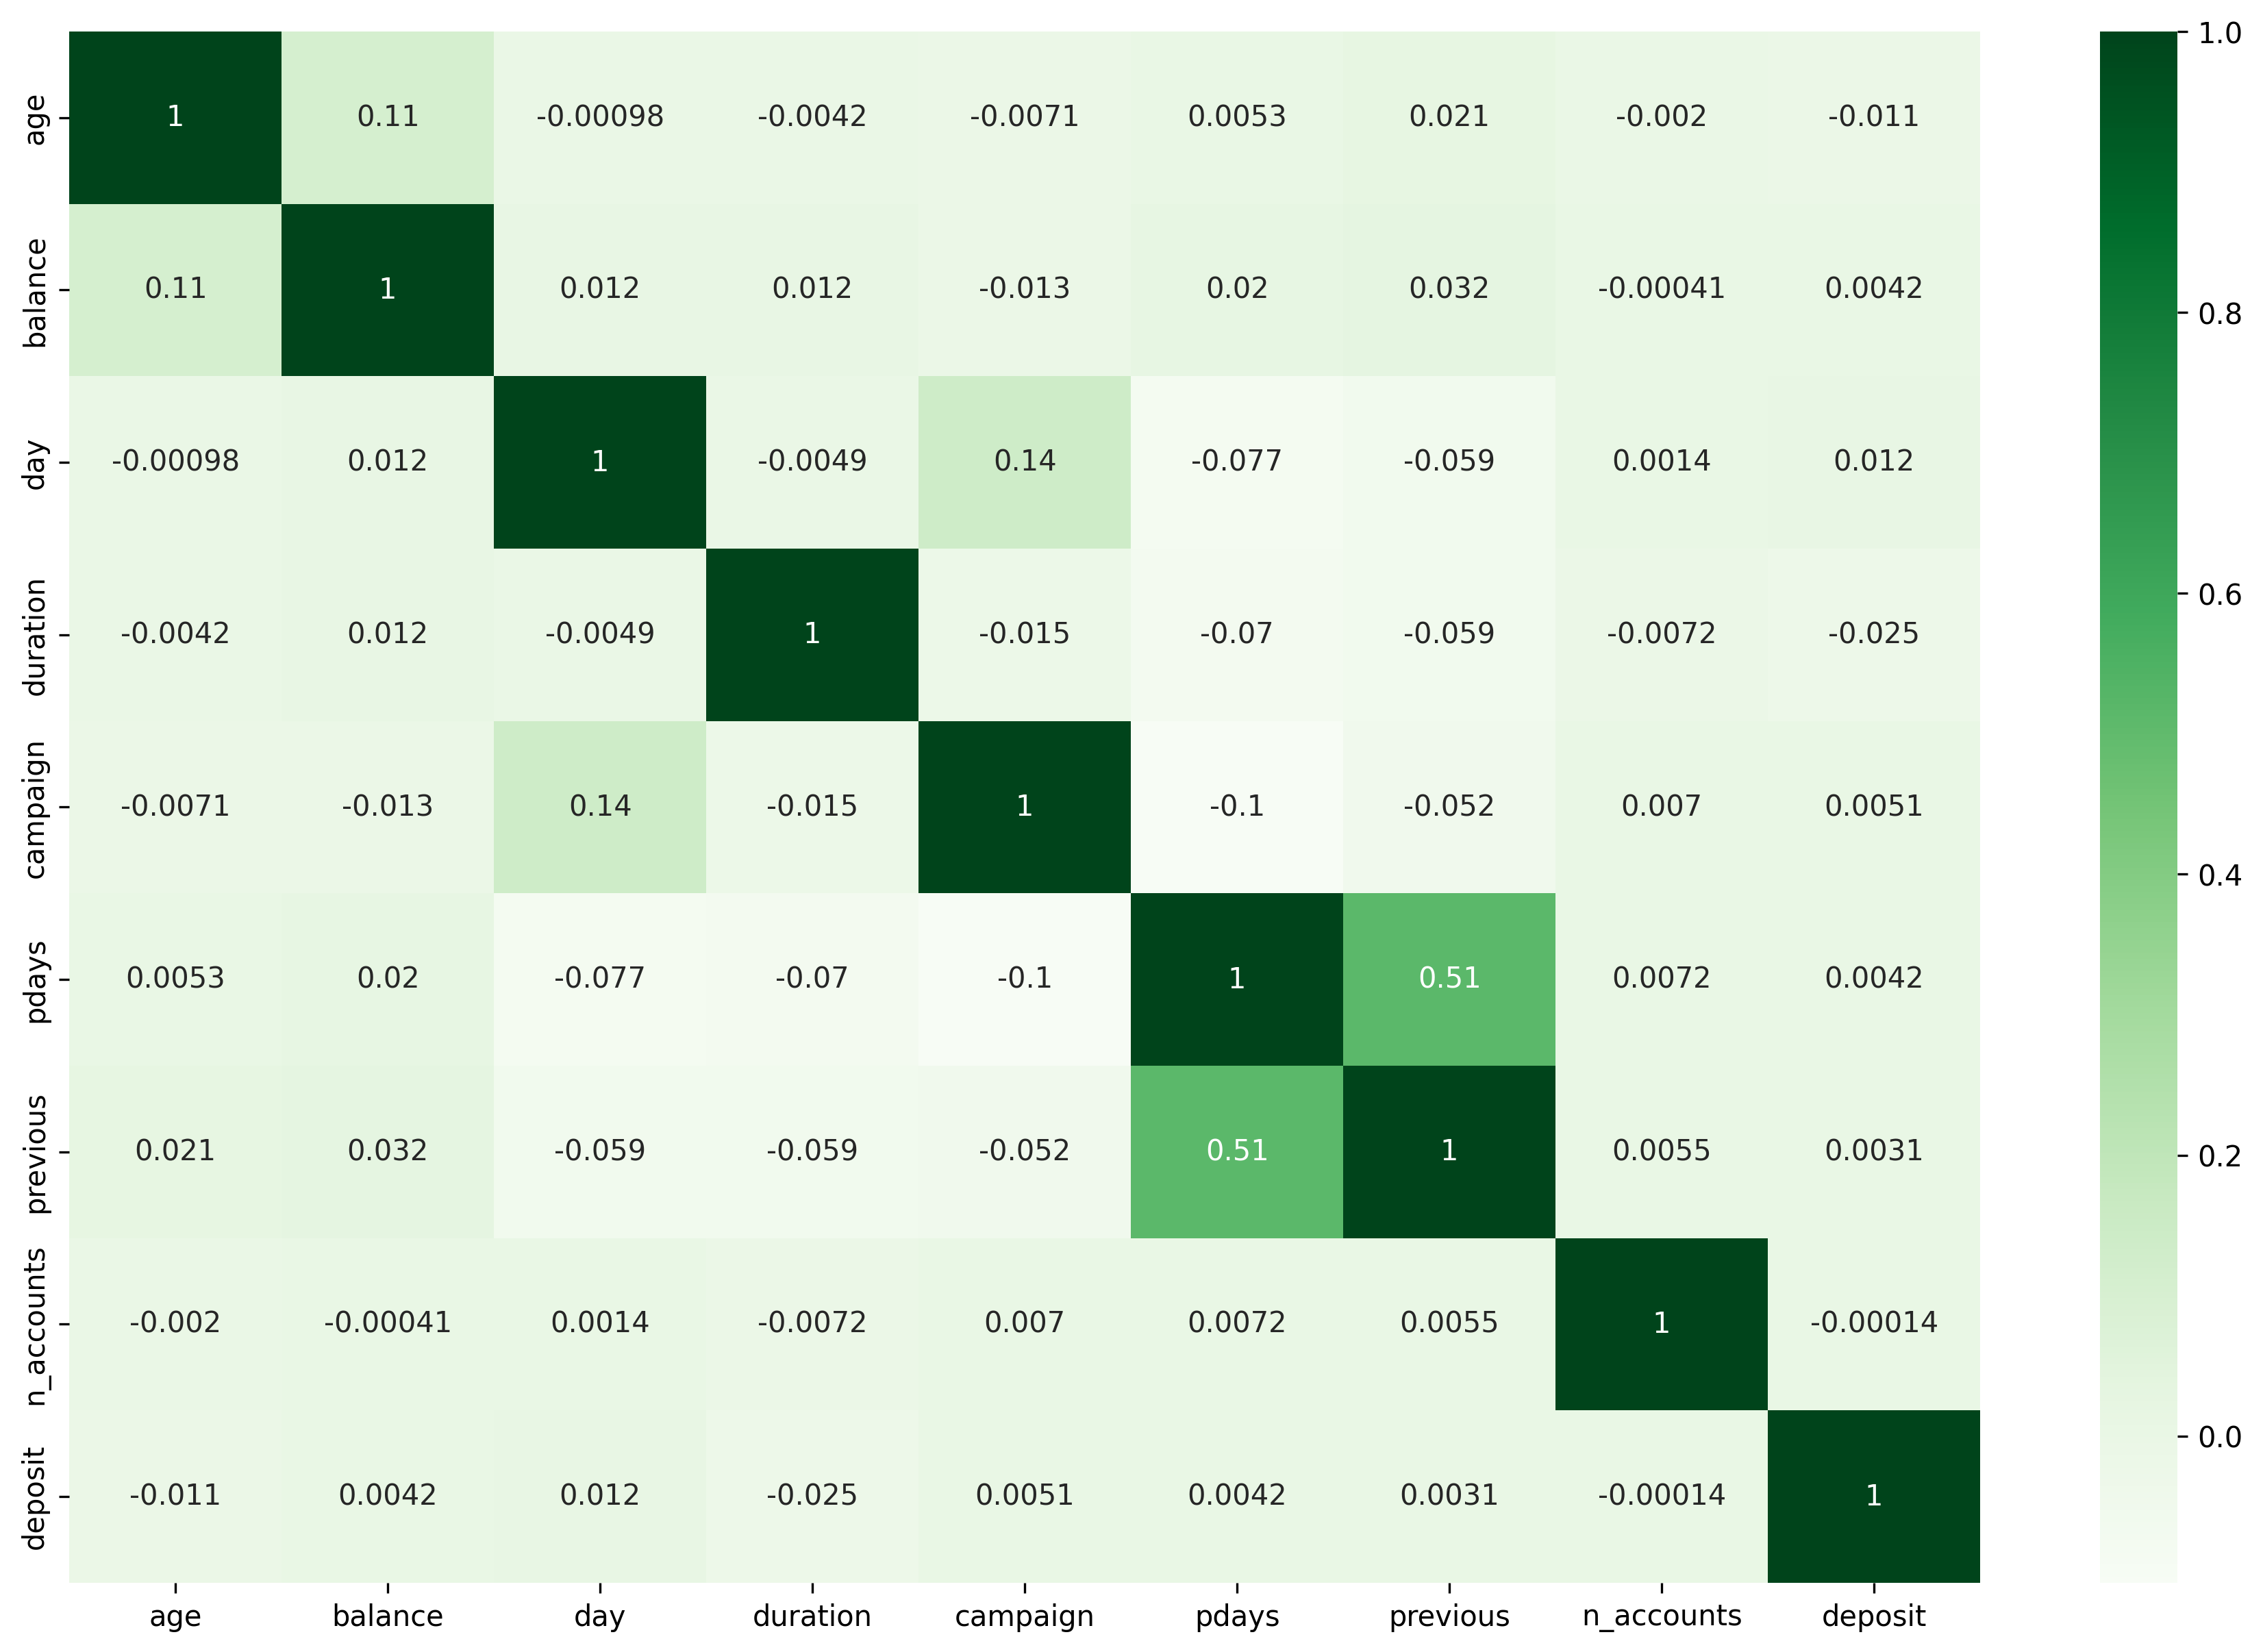

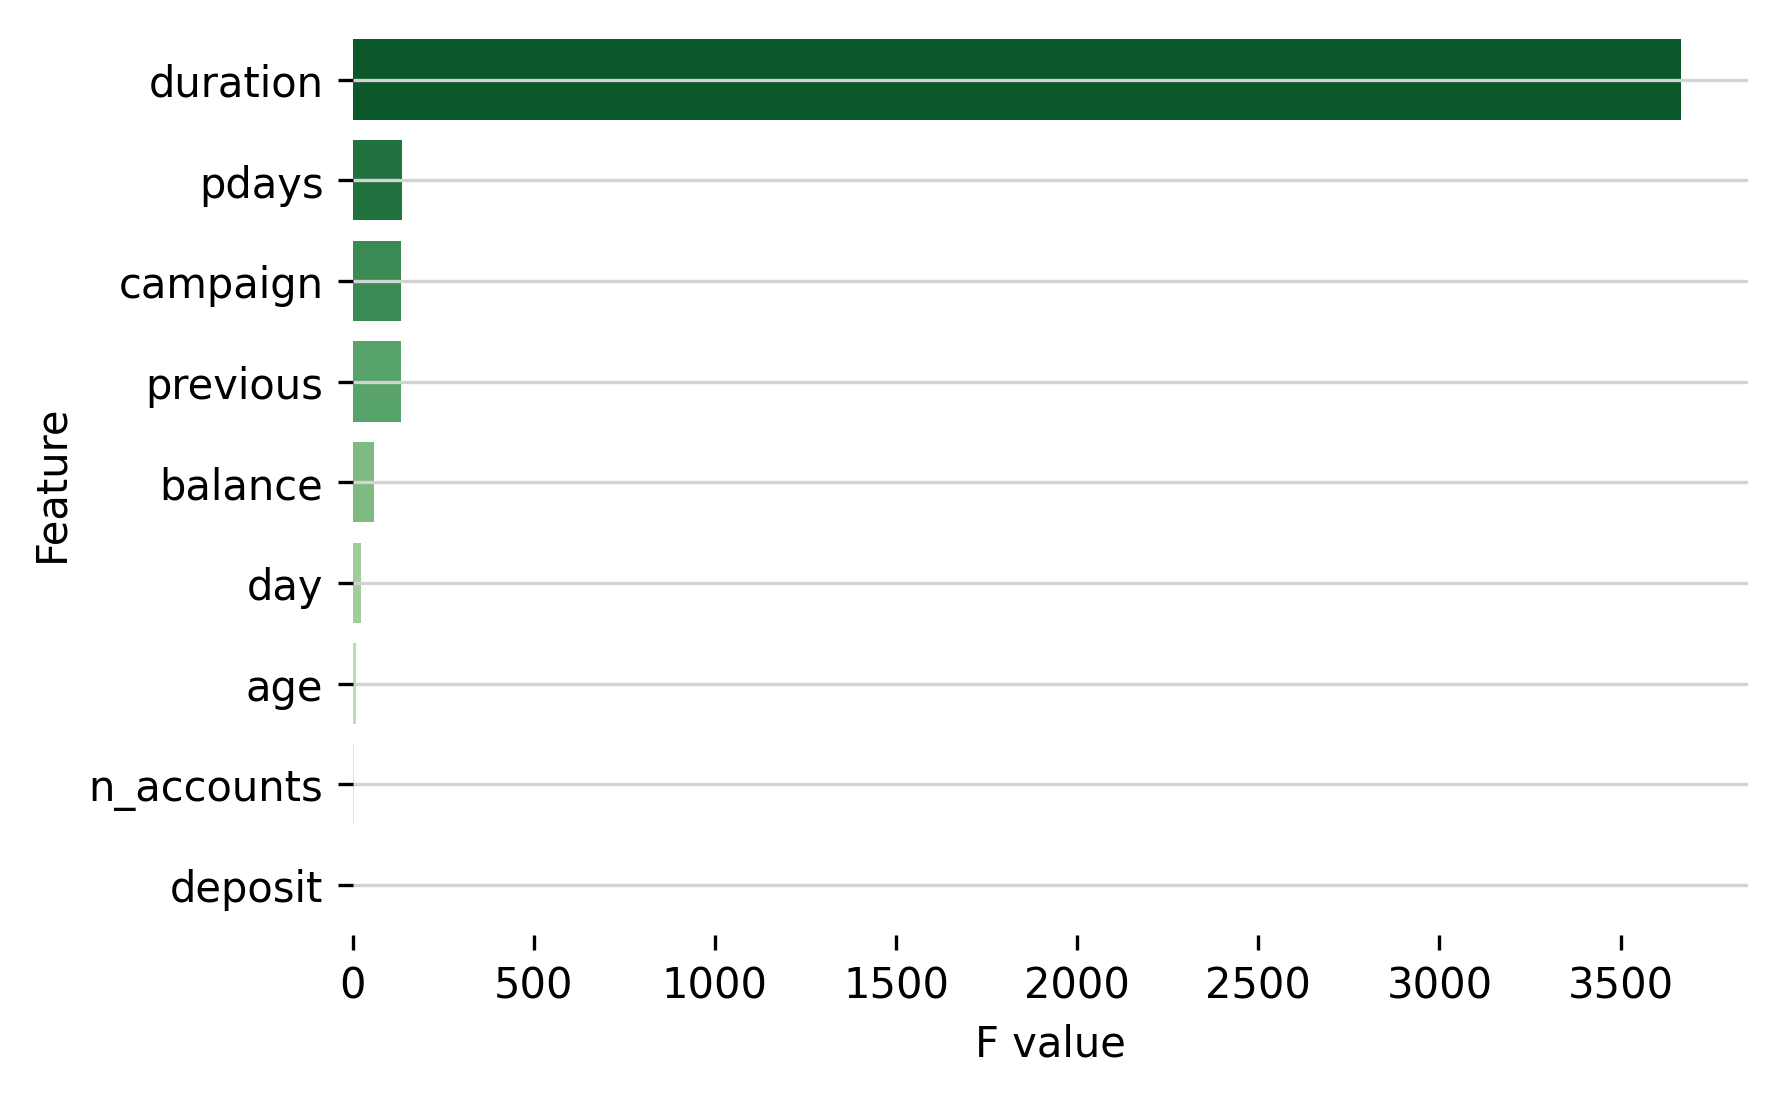

   F_value     Feature
0  3667.20    duration
1   137.74       pdays
2   133.63    campaign
3   133.53    previous
4    59.88     balance
5    22.74         day
6     8.68         age
7     2.80  n_accounts
8     0.93     deposit 

9 feature(s) ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'n_accounts', 'deposit'] were selected based on previously abstracted pipelines


,age,balance,day,duration,campaign,pdays,previous,n_accounts,deposit
0,49,1093,12,243,2,91,2,2,1
1,59,1304,18,220,1,-1,0,2,1
2,25,129,12,176,3,-1,0,2,1
3,58,2920,9,136,1,-1,0,2,1
4,26,11862,13,119,1,-1,0,2,1
...,...,...,...,...,...,...,...,...,...
12157,32,2688,14,216,1,57,1,2,1
12158,54,0,5,744,3,-1,0,2,1
12159,26,620,22,223,1,94,1,2,1
12160,49,1202,18,122,1,-1,0,2,1


In [4]:
X, y = kgfarm.select_features(entity_df, dependent_variable='membership', select_by='pipeline',
                             plot_correlation=True, plot_anova_test=True, show_f_value=True)
X